In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mall-customers/Mall_Customers.csv


# Import library

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

# Read Data

In [8]:
df = pd.read_csv('/kaggle/input/mall-customers/Mall_Customers.csv')


In [9]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df.shape

(200, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Visualization & Preprocessing

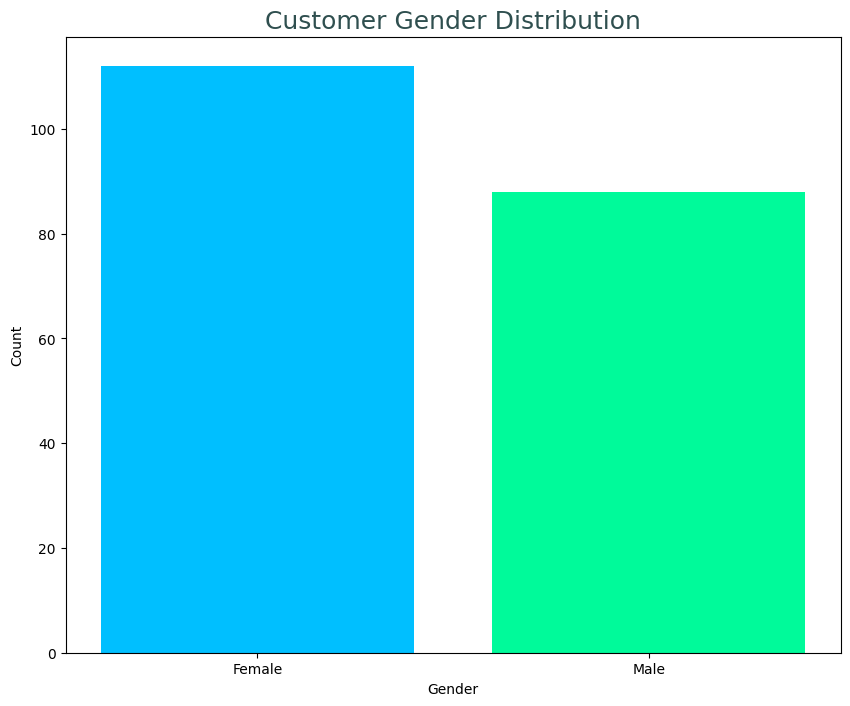

In [13]:

x = df['Genre'].value_counts()

plt.figure(figsize=(10,8))
plt.bar(x.index, x.values, color=["DeepSkyBlue", "MediumSpringGreen"])
plt.title("Customer Gender Distribution", fontdict={"fontsize":18}, color="DarkSlateGray")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


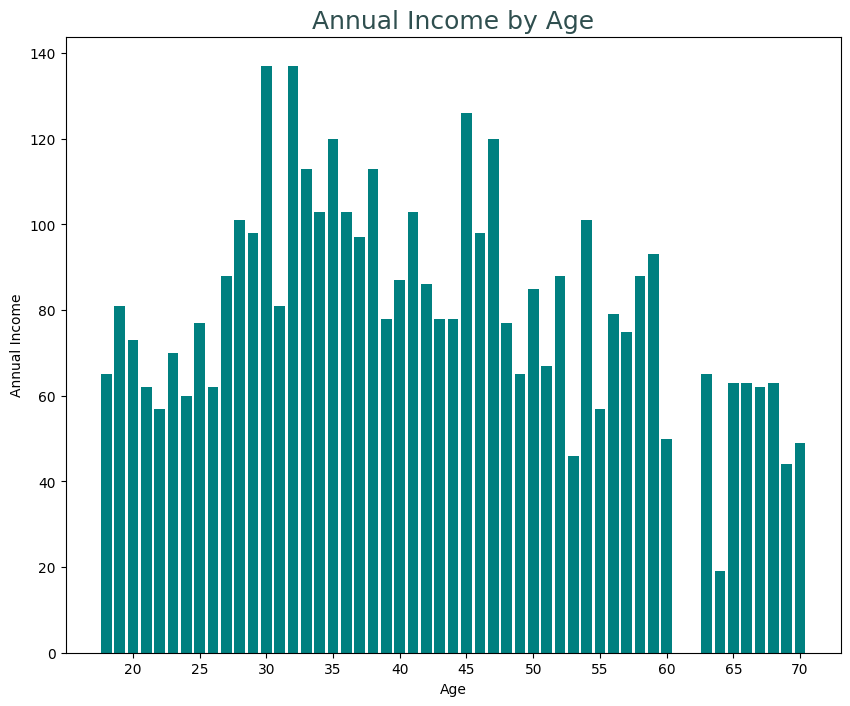

In [14]:
plt.figure(figsize=(10,8))
plt.bar(x=df['Age'], height=df['Annual Income (k$)'], color='teal')
plt.xlabel('Age')
plt.ylabel("Annual Income")
plt.title("Annual Income by Age", fontdict={"fontsize":18}, color="DarkSlateGray")
plt.xticks(np.arange(20, 75, 5))  
plt.show()


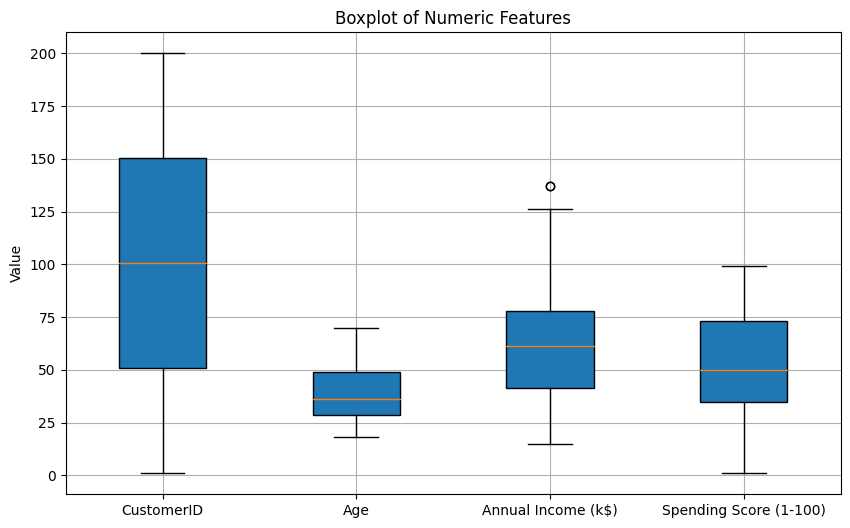

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

numeric_cols = df.select_dtypes(include='number')

plt.figure(figsize=(10, 6))
box = plt.boxplot(numeric_cols.values, patch_artist=True, labels=numeric_cols.columns)

plt.title("Boxplot of Numeric Features")
plt.ylabel("Value")
plt.grid(True)
plt.show()


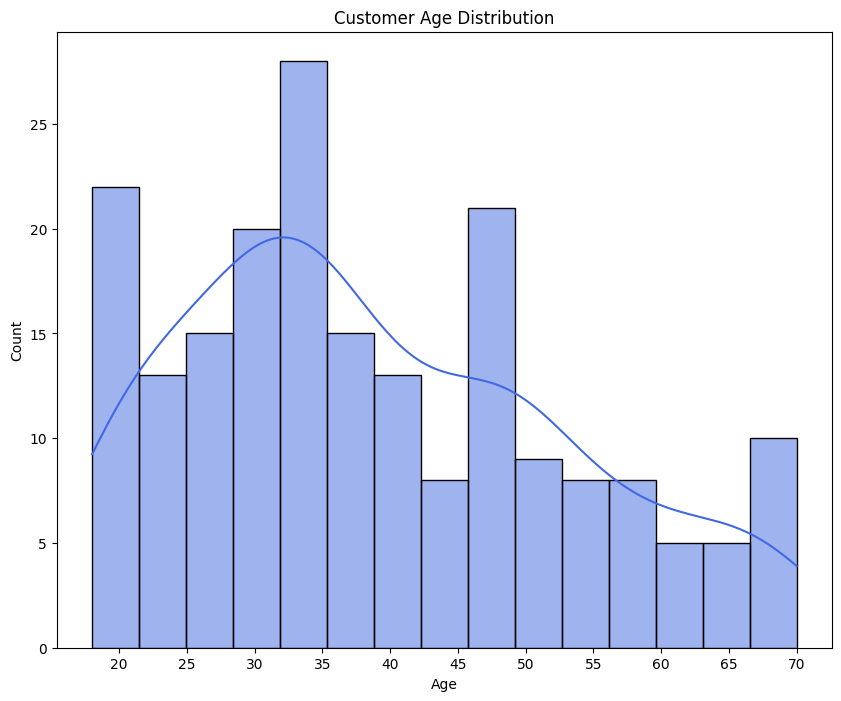

In [16]:
plt.figure(figsize=(10,8))
sns.histplot(df['Age'], bins=15, kde=True, color="RoyalBlue")
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.xticks(np.arange(20, 75, 5))
plt.show()


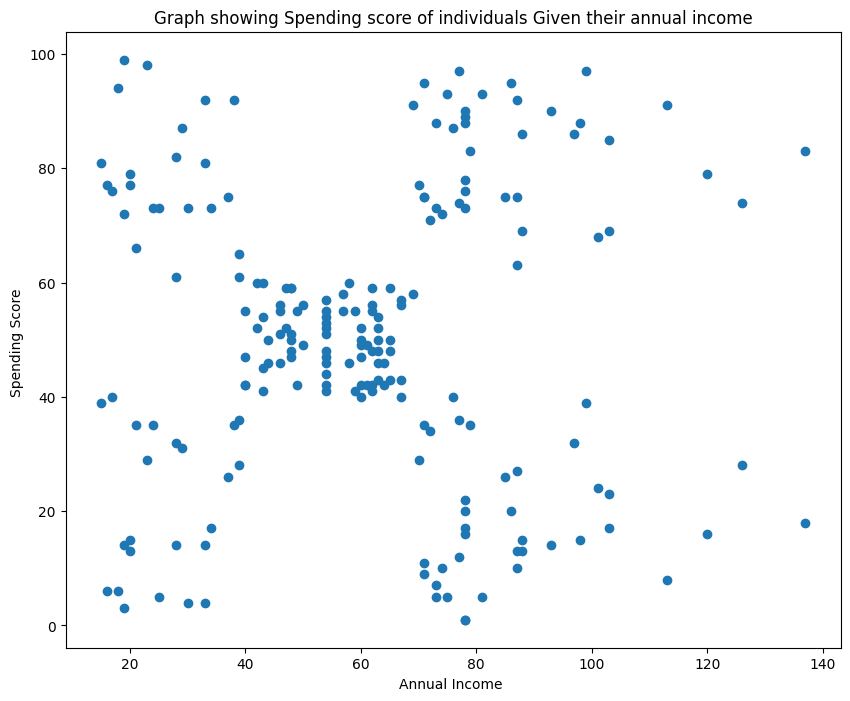

In [17]:
plt.figure(figsize=(10,8))
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"])
plt.xlabel("Annual Income ")
plt.ylabel("Spending Score ")
plt.title("Graph showing Spending score of individuals Given their annual income")
plt.show()

In [18]:
df = df.drop(['CustomerID', 'Age'], axis=1)


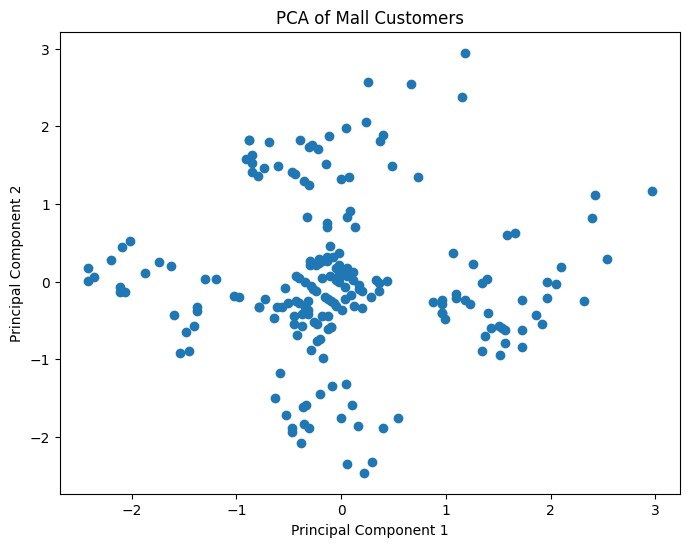

In [19]:
numeric_columns = [ 'Annual Income (k$)', 'Spending Score (1-100)']

X = df[numeric_columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

df_pca['Annual Income (k$)'] = df['Annual Income (k$)']
df_pca['Spending Score (1-100)'] = df['Spending Score (1-100)']

df_pca.head()

plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Mall Customers')
plt.show()


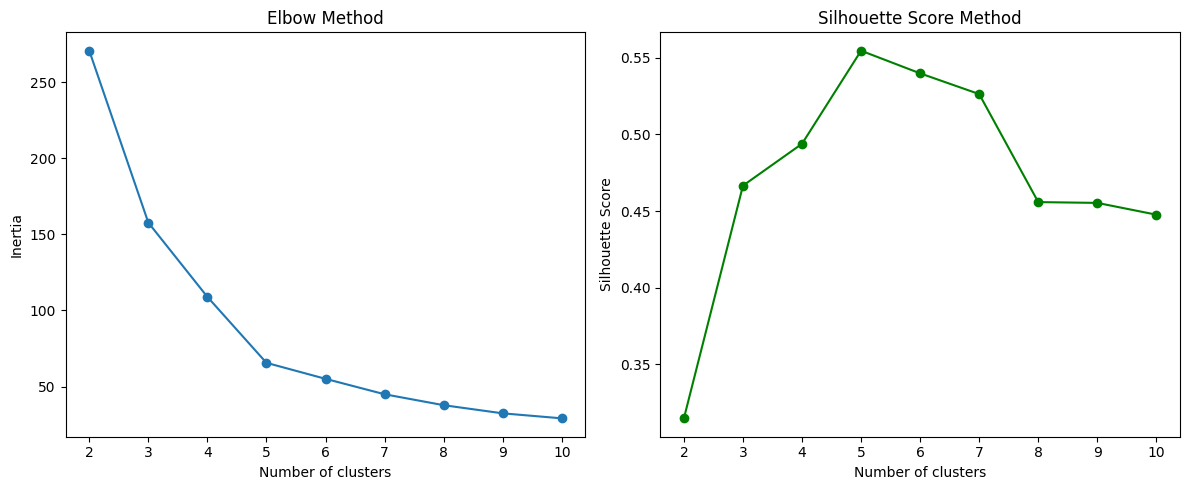

In [20]:
df = df.select_dtypes(include=['int64', 'float64'])

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Elbow & Silhouette
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))

# رسم النتائج
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


# Build K_MEANS Model

In [21]:
class KMeansClustering:
    # Initialize KMeans clustering model with k clusters and max iterations
    def __init__(self, k=5, max_iter=100):
        self.k = k  # Number of clusters
        self.max_iter = max_iter  # Maximum number of iterations for the algorithm
        self.centroids = None  # Placeholder for the centroids of clusters
        self.labels = None  # Placeholder for cluster labels for each data point

    # Initialize the centroids by randomly selecting 'k' points from the dataset
    def initialize_centroids(self, X):
        indices = np.random.choice(len(X), self.k, replace=False)  # Randomly select k points
        return X[indices]  # Return the selected centroids

    # Assign each data point to the closest centroid (based on Euclidean distance)
    def assign_clusters(self, X, centroids):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)  # Calculate distances from each point to centroids
        return np.argmin(distances, axis=1)  # Assign points to the nearest centroid

    # Update the centroids by calculating the mean of all points in each cluster
    def update_centroids(self, X, labels):
        return np.array([X[labels == i].mean(axis=0) for i in range(self.k)])  # Recalculate centroids as the mean of points in each cluster

    # Main function to fit the model to the data
    def fit(self, X):
        self.centroids = self.initialize_centroids(X)  # Initialize the centroids randomly
        for _ in range(self.max_iter):  # Iterate for max_iter times
            self.labels = self.assign_clusters(X, self.centroids)  # Assign each point to a cluster
            new_centroids = self.update_centroids(X, self.labels)  # Update centroids based on new labels
            if np.allclose(self.centroids, new_centroids):  # If centroids don't change, stop the algorithm
                break
            self.centroids = new_centroids  # Update the centroids for the next iteration
        return self.centroids, self.labels  # Return the final centroids and the labels for each point

    # Compute the inertia (sum of squared distances between points and their assigned centroids)
    def inertia(self, X):
        inertia = 0  # Initialize inertia
        for i in range(self.k):  # For each cluster
            cluster_points = X[self.labels == i]  # Get the points belonging to the i-th cluster
            centroid = self.centroids[i]  # Get the centroid of the i-th cluster
            inertia += np.sum((cluster_points - centroid) ** 2)  # Add the squared distances to inertia
        return inertia  # Return the total inertia

    # Elbow method to determine the optimal number of clusters by calculating inertia for different k values
    @staticmethod
    def elbow_method(X, k_range):
        inertias = []  # List to store the inertia values for different k
        for k in k_range:  # For each value of k in the specified range
            model = KMeansClustering(k=k)  # Initialize the KMeans model with the current k
            model.fit(X)  # Fit the model to the data
            inertias.append(model.inertia(X))  # Append the inertia for the current k to the list
        return inertias  # Return the list of inertias

    # Plot the clusters after fitting the model
    def plot_clusters(self, X):
        plt.figure(figsize=(8, 6))  # Create a new figure with specified size
        plt.scatter(X[:, 0], X[:, 1], c=self.labels, cmap='viridis', s=50)  # Plot the data points, colored by their cluster labels
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], c='red', marker='X', s=200, label='Centroids')  # Plot the centroids
        plt.xlabel("Feature 1 (scaled)")  # Label for the x-axis
        plt.ylabel("Feature 2 (scaled)")  # Label for the y-axis
        plt.title("K-Means Clustering")  # Title of the plot
        plt.legend()  # Display a legend
        plt.grid(True)  # Display a grid
        plt.show()  # Show the plot

    # Plot the elbow curve to help determine the optimal k based on inertia values
    @staticmethod
    def plot_elbow(k_range, inertias):
        plt.figure(figsize=(8, 5))  # Create a new figure with specified size
        plt.plot(k_range, inertias, 'bo-')  # Plot the inertia values for each k in the range
        plt.xlabel('Number of clusters (k)')  # Label for the x-axis
        plt.ylabel('Inertia')  # Label for the y-axis
        plt.title('Elbow Method For Optimal k')  # Title of the plot
        plt.grid(True)  # Display a grid
        plt.show()  # Show the plot



📍 Cluster Centers (Centroids):
   Annual Income (k$)  Spending Score (1-100)
0           55.296296               49.518519
1           88.200000               17.114286
2           26.304348               20.913043
3           25.727273               79.363636
4           86.538462               82.128205

🧩 Sample Clustered Data:
   Annual Income (k$)  Spending Score (1-100)  Cluster
0                  15                      39        2
1                  15                      81        3
2                  16                       6        2
3                  16                      77        3
4                  17                      40        2
5                  17                      76        3
6                  18                       6        2
7                  18                      94        3
8                  19                       3        2
9                  19                      72        3


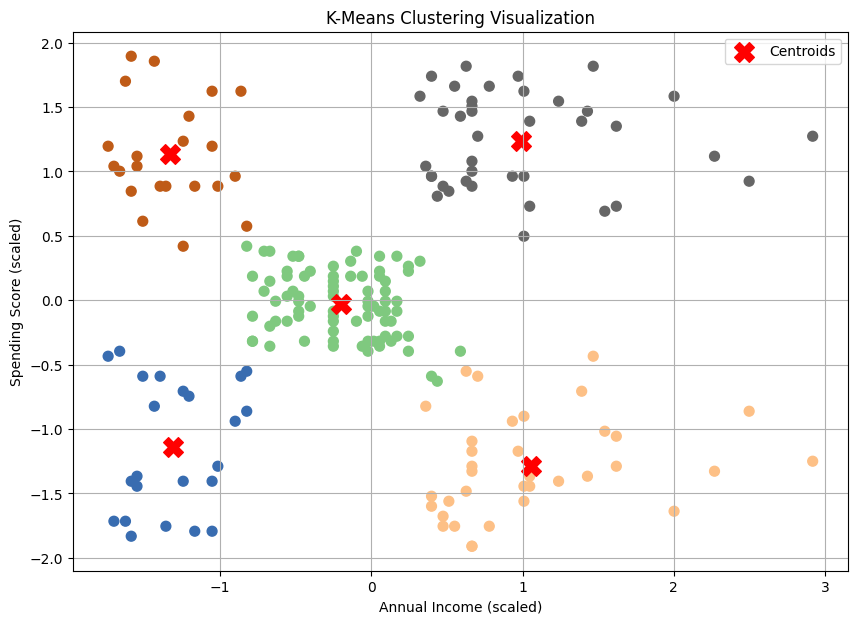

In [22]:
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X_scaled)
centroids = kmeans.cluster_centers_

centroids_df = pd.DataFrame(scaler.inverse_transform(centroids), columns=features)
print("\n📍 Cluster Centers (Centroids):")
print(centroids_df)

df['Cluster'] = labels

print("\n🧩 Sample Clustered Data:")
print(df[features + ['Cluster']].head(10))

plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='Accent', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("K-Means Clustering Visualization")
plt.legend()
plt.grid(True)
plt.show()

In [23]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calculate clustering performance metrics
sil_score = silhouette_score(X_scaled, labels)
db_index = davies_bouldin_score(X_scaled, labels)
ch_score = calinski_harabasz_score(X_scaled, labels)

print("\n📈 Clustering Performance Metrics:")
print(f"• Silhouette Score: {sil_score:.3f} (Higher is better)")
print(f"• Davies-Bouldin Index: {db_index:.3f} (Lower is better)")
print(f"• Calinski-Harabasz Index: {ch_score:.3f} (Higher is better)")



📈 Clustering Performance Metrics:
• Silhouette Score: 0.555 (Higher is better)
• Davies-Bouldin Index: 0.572 (Lower is better)
• Calinski-Harabasz Index: 248.649 (Higher is better)
